# 從 google drive 下載資料集
1. 1. 使用training_data_version3

In [ ]:
# ame
!gdown "1N-zQnfER0Mnx1S0pjwTmasSNiC9CL7Kz" --output ame.zip
!unzip ame.zip -d ame_data

# calli
!gdown "1ny4k-HXFVCypQWmyNSnOMDozyc9Fxp4a" --output calli.zip
!unzip calli.zip -d calli_data

# gura
!gdown "1oGWfRnBm_Y5yjeyIcGgvwz0qNUQVQsvC" --output gura.zip
!unzip gura.zip -d gura_data

# ina
!gdown "1AT4SrIUrUiVJPWjzFJL079_yvnkx3BH6" --output ina.zip
!unzip ina.zip -d ina_data

# kiara
!gdown "1r2-LTQK5dMskskGfs8QYH8pUgb0RahaZ" --output kiara.zip
!unzip kiara.zip -d kiara_data

# kronii
!gdown "1VGK-YQEZqxD4gQd2rq7o65JYjrxrqvpM" --output kronii.zip
!unzip kronii.zip -d kronii_data

# DF

In [ ]:
import glob
import pandas as pd


df = pd.DataFrame(columns=[ "path", "target" ])

for path in glob.glob("/content/ame_data/Watson_*.jpg"):
    s = pd.Series( [path, 0], index=[ "path", "target" ])
    df = df.append(s, ignore_index=True)

for path in glob.glob("/content/calli_data/Calli_*.jpg"):
    s = pd.Series( [path, 1], index=[ "path", "target" ])
    df = df.append(s, ignore_index=True)

for path in glob.glob("/content/gura_data/Gura_*.jpg"):
    s = pd.Series( [path, 2], index=[ "path", "target" ])
    df = df.append(s, ignore_index=True)

for path in glob.glob("/content/ina_data/Ina_*.jpg"):
    s = pd.Series( [path, 3], index=[ "path", "target" ])
    df = df.append(s, ignore_index=True)

for path in glob.glob("/content/kiara_data/Kiara_*.jpg"):
    s = pd.Series( [path, 4], index=[ "path", "target" ])
    df = df.append(s, ignore_index=True)

for path in glob.glob("/content/kronii_data/Kronii_*.jpg"):
    s = pd.Series( [path, 5], index=[ "path", "target" ])
    df = df.append(s, ignore_index=True)

In [3]:
df

,path,target
0,/content/ame_data/Watson_93.jpg,0
1,/content/ame_data/Watson_45.jpg,0
2,/content/ame_data/Watson_36.jpg,0
3,/content/ame_data/Watson_26.jpg,0
4,/content/ame_data/Watson_61.jpg,0
...,...,...
964,/content/kronii_data/Kronii_38.jpg,5
965,/content/kronii_data/Kronii_144.jpg,5
966,/content/kronii_data/Kronii_71.jpg,5
967,/content/kronii_data/Kronii_162.jpg,5


# 隨機檢查圖片

/content/ame_data/Watson_191.jpg


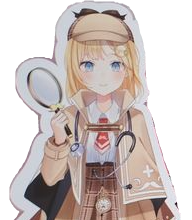

In [4]:
from tensorflow.keras.preprocessing.image import load_img
import random


random_index = random.randint(0, 968)

print(df["path"][random_index])
load_img(df["path"][random_index])

# 模型

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout


model_VGG = VGG16( include_top=False, input_shape=(250,250,3) )

# 參考VGG16 不訓練某些權重
for layer in model_VGG.layers:
    layer.trainable=False

# 
model = Sequential([
    model_VGG,
    BatchNormalization(),
    GlobalAveragePooling2D(),  # 512
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [7]:
model.compile( loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np


# to_categorical
y_categorical = to_categorical(df["target"])

x_train, x_test, y_train, y_test = train_test_split( np.array(df["path"]),
                               np.array(y_categorical),
                               test_size=0.2)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((775,), (194,), (775, 6), (194, 6))

In [10]:
# import numpy as np
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


# datagen = ImageDataGenerator(rotation_range=20,
#                  width_shift_range=0.2,
#                  height_shift_range=0.2,
#                  zoom_range=0.2,
#                  horizontal_flip=True)

# batch_size = 150

# for i in range(25):
#     idx = np.random.randint( 0, x_train.shape[0], batch_size )

#     imglist = []

#     for fn in x_train[idx]:
#         img = load_img( fn, target_size=(250, 250, 3) )
#         img = preprocess_input( np.array(img) )
#         imglist.append(img)

#     x = np.array(imglist)
#     y = y_train[idx]
#     result = model.train_on_batch(x, y) # train_on_batch 會輸出: loss值, 正確率
#     print("-----Times", i, "-----")
#     print(result)

In [11]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rotation_range=20,
                 width_shift_range=0.2,
                 height_shift_range=0.2,
                 zoom_range=0.2,
                 horizontal_flip=True)

batch_size = 150

for i in range(30):
    idx = np.random.randint( 0, x_train.shape[0], batch_size )

    imglist = []

    for fn in x_train[idx]:
        img = load_img(fn, target_size=(250, 250, 3))
        img = img.resize((250, 250))            # 將圖像大小調整為 250x250
        img = np.array(img)                 # 轉換為 NumPy array
        img = datagen.flow(np.expand_dims(img, axis=0))  # 輸入前必須擴張一個 batch 的維度 (之前只讀取一張圖片 250*250*3 但這邊需要批次處理 1*250*250*3)
        img = next(img)[0]                  # 從生成器中獲取一張圖像，並且刪除 batch 的維度
        img = preprocess_input(img)             # 預處理圖像
        imglist.append(img)

    x = np.array(imglist)
    y = y_train[idx]
    result = model.train_on_batch(x, y) # train_on_batch 會輸出: loss值, 正確率
    print("-----Times", i, "-----")
    print(result)

-----Times 0 -----
[1.8879714012145996, 0.1599999964237213]
-----Times 1 -----
[1.7833245992660522, 0.2133333384990692]
-----Times 2 -----
[1.7297492027282715, 0.23999999463558197]
-----Times 3 -----
[1.6529662609100342, 0.35333332419395447]
-----Times 4 -----
[1.6244688034057617, 0.3866666555404663]
-----Times 5 -----
[1.5068457126617432, 0.5666666626930237]
-----Times 6 -----
[1.4618831872940063, 0.5733333230018616]
-----Times 7 -----
[1.4363175630569458, 0.6333333253860474]
-----Times 8 -----
[1.3679605722427368, 0.6399999856948853]
-----Times 9 -----
[1.3648260831832886, 0.6333333253860474]
-----Times 10 -----
[1.2673578262329102, 0.7200000286102295]
-----Times 11 -----
[1.2414214611053467, 0.7333333492279053]
-----Times 12 -----
[1.2044025659561157, 0.7599999904632568]
-----Times 13 -----
[1.1543153524398804, 0.7333333492279053]
-----Times 14 -----
[1.0302834510803223, 0.8133333325386047]
-----Times 15 -----
[1.0072157382965088, 0.8199999928474426]
-----Times 16 -----
[1.031035900

In [12]:
batch_size = 200

idx = np.random.randint( 0, x_test.shape[0], batch_size )

imglist = []

for fn in x_test[idx]:
    img = load_img( fn, target_size=(250, 250, 3) )
    img = preprocess_input( np.array(img) )
    imglist.append(img)

x = np.array(imglist)
y = y_test[idx]
model.evaluate(x, y)

7/7 [==============================] - 8s 425ms/step - loss: 0.2987 - accuracy: 0.8650


[0.29868409037590027, 0.8650000095367432]

In [13]:
predicted_vtuber = model.predict(x).argmax(axis=-1)
print(predicted_vtuber)
actual_vtuber = np.array(y).argmax(axis=-1)
print(actual_vtuber)

7/7 [==============================] - 1s 166ms/step
[5 4 4 3 2 0 2 0 5 5 0 3 2 2 3 5 4 1 3 4 3 4 1 2 3 1 1 4 4 5 4 5 1 2 0 2 3
 2 4 3 3 2 3 3 0 1 4 4 4 3 3 3 4 4 3 0 3 5 4 4 4 4 1 4 4 4 4 4 2 2 5 1 3 4
 1 0 2 4 3 2 3 4 1 4 2 1 4 1 3 0 1 3 1 0 3 2 4 5 2 2 3 2 3 4 4 2 4 5 3 3 3
 1 2 3 2 4 5 1 0 3 3 4 0 5 4 4 4 4 2 5 2 4 0 2 0 3 3 2 3 4 4 5 3 1 2 4 3 4
 5 3 3 5 3 2 3 3 3 4 3 1 1 3 1 3 4 4 5 2 4 3 4 3 4 3 3 0 1 0 0 3 0 3 1 2 3
 4 0 3 4 0 2 4 4 3 1 3 3 4 2 3]
[5 4 4 0 2 0 2 0 5 5 0 3 2 2 3 5 4 1 0 4 3 4 1 2 3 1 1 4 4 5 4 5 1 2 0 2 3
 2 4 3 3 2 0 3 0 1 4 4 4 3 3 0 4 4 1 0 3 5 4 4 4 4 1 4 4 4 4 5 2 2 5 1 3 4
 1 0 2 4 3 2 0 4 1 4 2 1 4 1 0 0 1 1 1 0 2 2 4 5 2 2 3 2 3 4 4 2 4 5 3 3 3
 1 2 3 2 4 5 1 0 1 3 4 0 5 4 4 4 4 2 5 2 4 0 2 0 3 3 2 3 4 4 5 2 1 2 4 1 4
 5 3 1 5 2 2 5 3 3 4 0 1 1 0 1 3 5 4 5 2 4 3 4 3 4 1 5 0 1 0 0 1 0 3 1 2 3
 4 0 1 4 0 2 4 5 1 1 1 3 4 2 2]


In [14]:
from sklearn.metrics import confusion_matrix


trans= ["Ame", "Calli", "Gura", "Ina", "Kiara", "Kronii"]


mat = confusion_matrix(actual_vtuber, predicted_vtuber)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(6)],
       columns=["{}(pred)".format(trans[i]) for i in range(6)])

,Ame(pred),Calli(pred),Gura(pred),Ina(pred),Kiara(pred),Kronii(pred)
Ame(true),19,0,0,8,0,0
Calli(true),0,23,0,10,0,0
Gura(true),0,0,31,4,0,0
Ina(true),0,0,0,32,0,0
Kiara(true),0,0,0,0,51,0
Kronii(true),0,0,0,2,3,17


In [15]:
from tensorflow.keras.models import load_model


model.save('Vtuber_Identify_(tf_vgg16).h5')

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np


model = load_model("Vtuber_Identify_(tf_vgg16).h5")

img_path = "/content/multiple_7.jpg"
img = image.load_img(img_path, target_size=(250, 250, 3))

x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)

vtuber_list = ["ame", "calli", "gura", "ina", "kiara", "kronii"]


print(f"預測Vtuber為: {vtuber_list[preds.argmax()]}")

1/1 [==============================] - 0s 170ms/step
預測Vtuber為: ina


# 問題
1. 需要先順一次邏輯
2. 混淆矩陣大多對 真實場景卻出錯 該如何檢查
3. batch training時   augmentation 該放在哪邊
4. 我有辦法檢查我的模型著重的地方嗎?   還是只能跟之前一樣   一層層layer 檢查它偵測的區域
5. PNG 影響?

In [ ]:
# PNG 轉換 : https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img
# 想看模型專注在哪個區域 07 explanable AI 02 and 03